In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
import numpy as np


In [ ]:
(x_train, y_train ), (x_test, y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.size

50000

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(x,y,index) :
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y_train[index]])

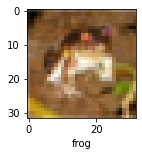

In [ ]:
plot_sample(x_train, y_train, 0)

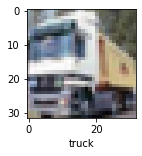

In [ ]:
plot_sample(x_train,y_train,1)

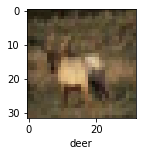

In [ ]:
plot_sample(x_train,y_train,3)

In [ ]:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)
print(y_train_one_hot[10])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#Create the models architecture :
model= Sequential()

#Add the first layer :
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))

#Add another convolution layer:
model.add(Conv2D(32, (5,5), activation='relu'))

#Add another pooling layer:
model.add(MaxPooling2D(pool_size= (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
			  optimizer = 'adam',	
			  metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train,y_train_one_hot,batch_size = 256,epochs = 10, validation_split = 0.2)


Epoch 1/10
157/157 [==============================] - 62s 389ms/step - loss: 1.7690 - accuracy: 0.3504 - val_loss: 1.5753 - val_accuracy: 0.4278
Epoch 2/10
157/157 [==============================] - 60s 382ms/step - loss: 1.4132 - accuracy: 0.4884 - val_loss: 1.3097 - val_accuracy: 0.5451
Epoch 3/10
157/157 [==============================] - 58s 371ms/step - loss: 1.2579 - accuracy: 0.5508 - val_loss: 1.2156 - val_accuracy: 0.5697
Epoch 4/10
157/157 [==============================] - 58s 371ms/step - loss: 1.1668 - accuracy: 0.5832 - val_loss: 1.1031 - val_accuracy: 0.6159
Epoch 5/10
157/157 [==============================] - 58s 372ms/step - loss: 1.0881 - accuracy: 0.6146 - val_loss: 1.0749 - val_accuracy: 0.6236
Epoch 6/10
157/157 [==============================] - 60s 380ms/step - loss: 1.0086 - accuracy: 0.6428 - val_loss: 0.9978 - val_accuracy: 0.6540
Epoch 7/10
157/157 [==============================] - 58s 370ms/step - loss: 0.9699 - accuracy: 0.6574 - val_loss: 0.9647 - val_ac

In [ ]:
#Evaluate the model using the test data set
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 5s 17ms/step - loss: 0.9627 - accuracy: 0.6685


0.6685000061988831

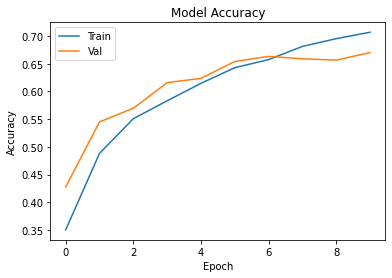

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')
plt.show()

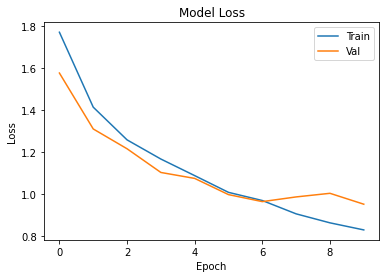

In [ ]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [ ]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving image_2022-10-21_000420340.png to image_2022-10-21_000420340.png


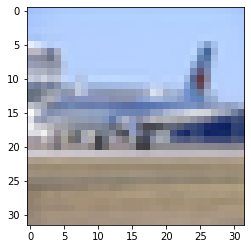

In [ ]:
#Show the image
new_image =plt.imread('image_2022-10-21_000420340.png')
img=plt.imshow(new_image)

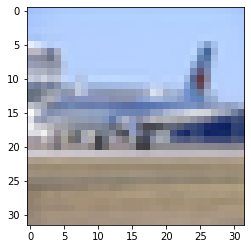

In [ ]:
#Resize the image
from skimage.transform import resize
resized_image= resize(new_image, (32,32,3))
img=plt.imshow(resized_image)

In [ ]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

1/1 [==============================] - 0s 19ms/step


array([[9.8130429e-01, 1.4949610e-03, 5.0066947e-03, 1.7418111e-04,
        6.7038038e-03, 9.6354081e-05, 2.5534237e-05, 8.2934421e-04,
        5.7195395e-04, 3.7928417e-03]], dtype=float32)

In [ ]:
#Sort the predictions from least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] =list_index[j]
            list_index[j] =temp

#Show the sorted labels in order
print(list_index)

[0, 4, 2, 9, 1, 7, 8, 3, 5, 6]


In [ ]:
#print the first 5 predictions
for i in range (5):
    print(classes[list_index[i]], ':' , round(predictions[0][list_index[i]]*100,2), '%')

airplane : 98.13 %
deer : 0.67 %
bird : 0.5 %
truck : 0.38 %
automobile : 0.15 %
